# 第4章 情報量基準

## 4.1 情報量規準

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [1]:
pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=66187622ca32983e53f08ac66d2dfe6fcff2ef8ca75075b009ff62c0acf4fae1
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [3]:
from sklearn.linear_model import LinearRegression
import itertools  # 組合わせを列挙する

In [4]:
res = LinearRegression()

In [5]:
def RSS_min(X,y,T):
    S_min=np.inf
    m=len(T)
    for j in range(m):
        q=T[j]
        res.fit(X[:,q],y)
        y_hat=res.predict(X[:,q])
        S=np.linalg.norm(y_hat-y)**2
        if S<S_min:
            S_min=S
            set_q=q
    return(S_min, set_q)

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()
X=boston.data[:,[0,2,4,5,6,7,9,10,11,12]]
y=boston.target

In [8]:
n,p=X.shape
AIC_min=np.inf
for k in range(1,p+1,1):
    T=list(itertools.combinations(range(p), k))
    # p個からk個を選ぶ組合わせを各列にもつ
    S_min, set_q=RSS_min(X,y,T)
    AIC=n*np.log(S_min/n)+2*k  ##
    if AIC<AIC_min:
        AIC_min=AIC
        set_min=set_q
print(AIC_min,set_min)

1619.787608556615 (0, 2, 3, 5, 7, 8, 9)


In [9]:
y_bar=np.mean(y)
TSS=np.linalg.norm(y-y_bar)**2

In [10]:
D_max=-np.inf
for k in range(1,p+1,1):
    T=list(itertools.combinations(range(p), k))
    S_min, set_q=RSS_min(X,y,T)
    D=1-(S_min/(n-k-1))/(TSS/(n-1))
    if D>D_max:
        D_max=D
        set_max=set_q
print(D_max,set_max)

0.7130213433266737 (0, 2, 3, 5, 7, 8, 9)


In [11]:
def IC(X,y,k):
    n,p=X.shape
    T=list(itertools.combinations(range(p), k))
    S, set_q=RSS_min(X,y,T)
    AIC=n*np.log(S/n)+2*k
    BIC=n*np.log(S/n)+k*np.log(n)
    return {'AIC':AIC, 'BIC':BIC}

In [12]:
AIC_seq=[]; BIC_seq=[]
for k in range(1,p+1,1):
    AIC_seq.append(IC(X,y,k)['AIC'])
    BIC_seq.append(IC(X,y,k)['BIC']) 

In [13]:
x_seq=np.arange(1,p+1,1)

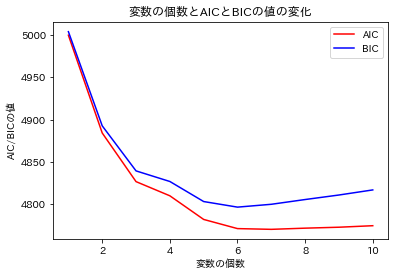

In [ ]:
plt.plot(x_seq,AIC_seq,c="red",label="AIC")
plt.plot(x_seq,BIC_seq,c="blue",label="BIC")
plt.xlabel("変数の個数")
plt.ylabel("AIC/BICの値")
plt.title("変数の個数とAICとBICの値の変化")
plt.legend()

## 4.2 有効推定量とFisher情報量行列

## 4.3 Kullback-Leibler 情報量

## 4.4 赤池の情報量規準(AIC)の導出